<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

from pymystem3 import Mystem
from nltk.stem import SnowballStemmer 
from collections import Counter

nd = pd.read_csv('/datasets/real_estate_data.csv')
nd.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


**Видим одну колонку, в которой фактические признаки разделены символом табуляции \t – прочитаем файл, указав этот разделитель.**

In [2]:
nd = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
nd.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#исследуем краткую сводку данных
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#исследуем пропущенные значения
nd.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#переименуем столбцы в более понятный и читабельный вид
nd.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Длинные названия столбцов заменил на:**
- total_images - *images* (количество фотографий)
- total_area - *area* (площадь объекта)
- last_price - *price* (цена объекта)
- first_day_exposition - *data* (дата публикации объявления)
- floor - *floor_flat* (этаж объекта)
- floors_total - *floors_house* (этажность дома)
- is_apartment - *apartment* (тип помещения "аппартаменты")
- open_plan - *layout* (планировка объекта)
- locality_name - *city* (название населенного пункта)
- airports_nearest - *airports* (расстоние до аэропорта в м)
- cityCenters_nearest - *distance_center* (расстояние до центра)
- parks_around3000 - *parks_3km* (число парков в радиусе 3 км)
- parks_nearest - *park* (расстояние до ближайшего парка)
- ponds_around3000 - *ponds3km* (число водоёмов в радиусе 3 км)
- ponds_nearest - *pond* (расстояние до ближайшего водоёма)

In [6]:
nd.columns = ['images', 'price', 'area', 'data',
       'rooms', 'ceiling_height', 'floors_house', 'living_area', 'floor_flat',
       'apartment', 'studio', 'layout', 'kitchen_area', 'balcony',
       'city', 'airports', 'distance_center',
       'parks_3km', 'park', 'ponds3km',
       'pond', 'days_exposition']
nd.sample(7)

,images,price,area,data,rooms,ceiling_height,floors_house,living_area,floor_flat,apartment,...,kitchen_area,balcony,city,airports,distance_center,parks_3km,park,ponds3km,pond,days_exposition
135,7,3990000.0,48.00,2018-09-28T00:00:00,1,3.25,5.0,20.50,1,False,...,17.00,NaN,Сестрорецк,57998.0,34928.0,0.0,NaN,2.0,443.0,216.0
12449,15,6200000.0,52.00,2018-04-20T00:00:00,1,2.75,25.0,17.50,12,False,...,18.70,NaN,Санкт-Петербург,11555.0,12099.0,0.0,NaN,1.0,527.0,15.0
4152,5,2700000.0,36.50,2015-06-25T00:00:00,1,2.70,8.0,16.70,1,NaN,...,11.30,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,618.0
18482,6,6990000.0,58.59,2018-09-19T00:00:00,2,2.75,13.0,31.26,13,NaN,...,14.29,NaN,Санкт-Петербург,40126.0,8291.0,2.0,119.0,0.0,NaN,89.0
14143,20,25000000.0,109.00,2018-02-22T00:00:00,2,3.00,6.0,31.90,5,NaN,...,43.80,NaN,Санкт-Петербург,24194.0,4327.0,0.0,NaN,0.0,NaN,370.0
12365,0,12614850.0,86.70,2015-11-25T00:00:00,3,NaN,11.0,NaN,10,NaN,...,12.40,NaN,Санкт-Петербург,31364.0,5045.0,1.0,485.0,0.0,NaN,NaN
11567,10,6800000.0,52.80,2018-01-15T00:00:00,2,2.75,10.0,27.30,10,NaN,...,10.60,1.0,Санкт-Петербург,15936.0,11474.0,1.0,548.0,1.0,992.0,NaN


In [7]:
#посмотрим общую информацию по числовым значениям
nd.describe()

,images,price,area,rooms,ceiling_height,floors_house,living_area,floor_flat,kitchen_area,balcony,airports,distance_center,parks_3km,park,ponds3km,pond,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
#и нечисловым признакам
nd.describe(include=['object', 'bool'])

,data,apartment,studio,layout,city
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


In [9]:
#посмотрим на количество дубликатов
nd.duplicated().sum()

0

### Вывод

**Первые наблюдения**

Файл содержит данные по 23699 объектам недвижимости, каждый из которых описывается 22 признаками (17 количественных, 4 категориальных и 1 временной). У большинства признаков есть пропущенные значения. Это может быть вызвано ошибками при внесении данных или ошибках при выгрузке. Дополнительно изучив форму для подачи объявления на Яндекс.Недвижимость, можно заметить, что часть данных заполняется непосредственно пользователем, а остальная часть подтягивается сервисом Яндекс.Карты. по указанному адресу. Так, например, детальную информацию об объекте (квартира, комната и т.д.) может указать только собственник объекта, потому что такие точные данные как общая и жилая площадь, а тем более площадь кухни, содержатся только в технической документации, которая находится на руках у собственника. А информацию о расстоянии объекта до аэропорта и центра города с точностью до метра, может измерить и занести в базу только определенный сервис. Согласно требований к подаче объявления, пользователь обязан указать точный адрес объекта, поэтому данные о расстоянии могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего. Таким образом, для дальнейшего понимания, обработки данных и анализа, первую градацию базы можно разделить на "ручную" и "машинную". 

*К ручной группе будут относиться колонки:* 
- images, price, area, rooms, ceiling_height, living_area, floor_flat, kitchen_area, balcony, apartment, studio, layout, city.

*К машинной группе будут относиться колонки:*
- floors_house (также подтягивается из карты), airports,	distance_center, parks_3km,	park, ponds3km, pond, days_exposition, data.

**Вкратце**
- Явных дубликатов в базе нет. Нужно будет проверить еще раз на этапе заполнения пропусков и после него.
- Пропусков хоть отбавляй, особенно для признака "апартаменты". Само понятие апартаменты довольно размытое. Гoвopя ycлoвнo, aпapтaмeнты — нeжилыe пoмeщeния, в кoтopыx coздaны ycлoвия для пpoживaния.
- Пропусков в количестве парков/водоемов почти в 3 раза меньше, чем пропусков в признаке расстояния до ближайшего парка/водоема. Это говорит о явном сбое при выгрузке, либо, в работе сервиса карт при подтягивании данных к объекту.
- Пропуски в площадях - данные, которые могут быть не заполнены просто по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь кухни продавцам некогда. Также выясним, нет ли такой связи, что если квартира - студия, то там отсутствуют эти данные. Ведь в них нет явного деления площади на ту, которая относится к кухне, и ту, которая относится к жилой площади.
- Признак ceiling_height - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков, иначе бы данные присутствовали. Будем смотреть, как можно заполнить. Вполне возможно, это будет средний показатель ceiling_height по населенному пункту.
- Непонятны пропуски в названии населенного пункта. 
- У таких признаков как balcony, floors_house и days_exposition установлен тип как float64, им стоит присвоить целочисленные значения. 
- Признак data представляет собой дату публикации объявления. Для нее мы отбросим время приведя столбец к формату %Y-%m-%d.
- В максимальных значениях есть неправдоподная информация, например стометровые потолки и 19 комнатные квартиры, с площадью в 900 кв.м. Нужно будет исследовать отдельно.

**Данные довольно "грязные", но будем искать пути решения для их максимально корректного заполнения.**

## Предобработка данных

In [10]:
#заменим пропущенные значения в столбце balcony на 0, так как вероятнее имелось в виду что в квартире нет балконов
nd['balcony'] = nd['balcony'].fillna(0)
nd['balcony'].isna().sum()

0

In [11]:
#разберемся с апартаментами
nd['apartment'].unique()

array([nan, False, True], dtype=object)

✔️ Как и ожидалось, в данном столбце фигурируют два уникальных значения и пропуски. Признак апартаментов в таблице указывает на тип объекта, т.е. либо истина, либо ложь. Это подтверждает также форма заполнения объявления, где пользователю необходимо выбрать между "апартаментами" и "жилым фондом", т.е. жилой квартирой. Следовательно, если пользователь пропустил это строку, значит он скорее всего не разбирается в этих понятиях и поэтому решил пропустить этот шаг, так как владельцы апартаментов в основном "продвинутые" и современные люди, и точно знают что они купили, а при продаже точно бы указали тип свого жилища. 
По статистике, апартаменты приобретают в основном для сдачи жилья в наем, т.е. для коммерческой цели. Также, это некий временный вариант решения жилищного вопроса для наименее обеспеченных, либо, наоборот, дополнительное жилье для самых богатых. И доля такого типа в общей струтуре недвижимости городов значительно ниже чем жилого фонда, следовательно и на рынке продаж их соотношение будет различаться в десятки раз. Поэтому считаю, что все пропущенные значения можно заменить на False.

In [12]:
# заменяем пропущенные значения в столбце apartment на False
nd['apartment'] = nd['apartment'].fillna(False)
nd['apartment'].unique()

array([False,  True])

✔️ Для дальнейшей обработки значений напишем функцию, которая получает на входе название признака, и возвращает число пропущенных значений. 

In [13]:
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(nd[column].isna().value_counts()[1] / len(nd), 2) + ' значений')

In [14]:
#проверим высоту потолков
print_nan_ratio('ceiling_height')
ceiling_medians = nd.pivot_table(index='floors_house', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

Пропущено 38.8% значений


,median,count
floors_house,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [15]:
#заменим значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    nd.loc[(nd['floors_house'].isna()) | 
             ((nd['floors_house'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = nd['ceiling_height'].describe()[5]

In [16]:
#медианы из сгруппированной таблицы вставим на места пропущенных значений высоты потолков для дома соответствующей этажности
#посчитаем количество пропущенных значений после проделанной замены
for floor in ceiling_medians.index:
    nd.loc[(nd['ceiling_height'].isna()) & 
             (nd['floors_house'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']
nd['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

✔️ Посчитаем медианное соотношение межу жилой площадью и общей площадью квартиры; заполним пустые значения умножив медианное соотношение на площадь квартиры для соответствующих строк. Такую же операцию проделаем для площади кухни. Причина образования пустых значений - человек не заполнил/не знал нужную информацию.

In [17]:
def median_area(area_m, total_m=nd["area"]):
    proportion = area_m/total_m
    median = proportion.fillna(proportion.median())
    area_m = median * total_m
    return area_m

In [18]:
nd["living_area"] = median_area(nd["living_area"])

In [19]:
nd["kitchen_area"] = median_area(nd["kitchen_area"])

In [20]:
#проверим число этажей в доме
print_nan_ratio('floors_house')
nd.dropna(subset=['floors_house'], inplace=True)

Пропущено 0.4% значений


✔️ Пропущено всего 0,4% значений. Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. Согласно форме заполнения объявления, пользователь может вручную указать этажность дома, но система автоматически заполняет данные на основе точного адреса.

In [21]:
#аналогично поступим с названиями населенных пунктов
print_nan_ratio('city')
nd.dropna(subset=['city'], inplace=True)

Пропущено 0.2% значений


✔️ Важным фактором, оказывающим влияние на стоимость объекта недвижимости, является его расположение. Местоположение, как правило, наиболее существенный и динамичный фактор, который влияет на стоимость объекта. Влияние местоположения можно разделить на макро- и микрофакторы. Макрофакторы — это близость объекта недвижимости к крупным городским центрам, а микрофакторы — это его непосредственное окружение. Поэтому стоит уделить отдельное внимание пропускам в признаке "расстояние до центра".

In [22]:
print_nan_ratio('distance_center')

Пропущено 23.3% значений


✔️Так как наибольшее количество объектов выставленных на продажу находится в Санкт-Петербурге, посмотрим сколько пропусков именно там. 

In [23]:
round(len(nd[(nd['city'] == 'Санкт-Петербург') & (nd['distance_center'].isna())]) / len(nd.reset_index(drop=True).query('city == "Санкт-Петербург"')), 3)

0.004

✔️ Из всех квартир Санкт-Петербурга отсутствует информация по расстоянию до центра для 0,4% квартир. Это просто мизерное значение чтобы повлиять на исход анализа именно для этого города. Так как зависимость стоимости объекта недвижимости от расстояния до центар города больше относится к областному центру, чем к районным и перефирии, то пропущенные значения как и по остальным пропускам можно заменить на 0. 

In [24]:
#проверим остальные значения из "машинной"  группы
print('Расстояние до ближайшего аэропорта:')
print_nan_ratio('airports')
print('Число парков в радиусе 3 км:')
print_nan_ratio('parks_3km')
print('Расстояние до ближайшего парка:')
print_nan_ratio('park')
print('Число водоемов в радиусе 3 км:')
print_nan_ratio('ponds3km')
print('Расстояние до ближайшего водоема:') 
print_nan_ratio('pond')
print('Расстояние до центра:')
print_nan_ratio('distance_center')
print('Длительность размещения объявления:')
print_nan_ratio('days_exposition')

Расстояние до ближайшего аэропорта:
Пропущено 23.4% значений
Число парков в радиусе 3 км:
Пропущено 23.3% значений
Расстояние до ближайшего парка:
Пропущено 65.9% значений
Число водоемов в радиусе 3 км:
Пропущено 23.3% значений
Расстояние до ближайшего водоема:
Пропущено 61.7% значений
Расстояние до центра:
Пропущено 23.3% значений
Длительность размещения объявления:
Пропущено 13.5% значений


In [25]:
nd['airports'] = nd['airports'].fillna(0)
nd['parks_3km'] = nd['parks_3km'].fillna(0)
nd['park'] = nd['park'].fillna(0)
nd['ponds3km'] = nd['ponds3km'].fillna(0)
nd['pond'] = nd['pond'].fillna(0)
nd['distance_center'] = nd['distance_center'].fillna(0)

In [26]:
#в данных по экспозиции заменим пропуски на медианные значения
nd.loc[nd['days_exposition'].isna(), 'days_exposition'] = nd['days_exposition'].describe()[5]

✔️ Пропущенные значения в этих признаках, кроме данных об экспозиции, заменены на нули, так как они скорее всего не будут использованы в текущем исследовании, кроме расстояния до центра, а nanы только будут мазолить глаза. Как я ранее уже и предполагал, при заполнении этой информации системой на основе картографических данных, могла произойти ошибка системы либо система не смогла автоматически определить нужные значения.

In [27]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
images             23565 non-null int64
price              23565 non-null float64
area               23565 non-null float64
data               23565 non-null object
rooms              23565 non-null int64
ceiling_height     23565 non-null float64
floors_house       23565 non-null float64
living_area        23565 non-null float64
floor_flat         23565 non-null int64
apartment          23565 non-null bool
studio             23565 non-null bool
layout             23565 non-null bool
kitchen_area       23565 non-null float64
balcony            23565 non-null float64
city               23565 non-null object
airports           23565 non-null float64
distance_center    23565 non-null float64
parks_3km          23565 non-null float64
park               23565 non-null float64
ponds3km           23565 non-null float64
pond               23565 non-null float64
days_exposition    23565 n

✔️ Все необходимые и "запасные" пропуски заполнены. Далее нужно привести в порядок типы данных.

**Замена типов данных**

In [28]:
# заменим тип данных по дате публикации со строчного на datetime
nd['data'] = pd.to_datetime(nd['data'], format='%Y-%m-%d')
nd['data'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: data, dtype: datetime64[ns]

In [29]:
#переведем данные стоимости объекта и количества балконов в удобный формат
nd['price']=nd['price'].astype('int')
nd['balcony']=nd['balcony'].astype('int')

In [30]:
#а данные жилой площади и кухни округлим до 1 знака после запятой
nd['living_area']=nd['living_area'].round(1)
nd['kitchen_area']=nd['kitchen_area'].round(1)

In [31]:
nd.sample(7)

,images,price,area,data,rooms,ceiling_height,floors_house,living_area,floor_flat,apartment,...,kitchen_area,balcony,city,airports,distance_center,parks_3km,park,ponds3km,pond,days_exposition
5703,3,9400000,84.0,2015-09-21,4,2.80,3.0,47.7,2,False,...,14.5,0,Санкт-Петербург,17860.0,7172.0,1.0,385.0,0.0,0.0,302.0
16381,6,3800000,38.0,2019-05-01,1,2.50,16.0,18.0,2,False,...,8.0,2,Санкт-Петербург,12416.0,11638.0,1.0,460.0,1.0,598.0,95.0
1629,10,6800000,50.9,2019-02-09,1,3.00,5.0,19.8,5,False,...,10.4,0,Санкт-Петербург,33814.0,6947.0,3.0,336.0,2.0,316.0,95.0
325,4,4500000,42.1,2019-04-26,2,2.50,9.0,28.0,2,False,...,7.0,0,Санкт-Петербург,13889.0,10773.0,0.0,0.0,0.0,0.0,95.0
17633,8,4000000,53.4,2016-05-18,2,2.70,16.0,21.1,1,False,...,10.3,0,Санкт-Петербург,31962.0,12471.0,0.0,0.0,0.0,0.0,435.0
21814,14,6500000,47.0,2018-04-03,2,2.75,20.0,28.0,16,False,...,9.0,0,Санкт-Петербург,36772.0,11925.0,0.0,0.0,2.0,902.0,63.0
20970,12,3310000,56.0,2017-06-02,2,2.55,5.0,31.0,5,False,...,9.7,1,Коммунар,0.0,0.0,0.0,0.0,0.0,0.0,318.0


## Рассчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу:

   - цену квадратного метра;
   - день недели, месяц и год публикации объявления;
   -  этаж квартиры; варианты — первый, последний, другой;
   - соотношение жилой и общей площади, а также отношение площади кухни к общей.

✔️ Рассчитаем цену квадратного метра, заодно переведем в целочисленный формат, так как в коппейках стоимость квадратного метра не принято указывать.

In [32]:
#стоимость квадратного метра
nd['price_kvm'] = round(nd['price'] / nd['area'], 0).astype('int')
nd['price_kvm'].sample(5)

626       60303
14089    102441
11870     94074
18464     30851
2457      43333
Name: price_kvm, dtype: int64

In [33]:
#день недели, месяц и год публикации объявления
nd['weekday'] = nd['data'].dt.weekday_name
nd['month'] = nd['data'].dt.month
nd['year'] = nd['data'].dt.year

In [34]:
#название месяца преобразуем в сокращенном формате
nd['month'] = nd['month'].apply(lambda x: calendar.month_abbr[x])

In [35]:
#категоризация этажей
def floor_groups(row):
    if row['floor_flat'] == 1:
        return 'первый этаж'
    elif row['floor_flat'] == row['floors_house']:
        return 'последний этаж'
    return 'другой этаж'
nd['floor_groups'] = nd.apply(floor_groups, axis=1)


In [36]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей.
nd['living_area_ratio'] = round(nd['living_area'] / nd['area'], 3)
nd['kitchen_area_ratio'] = round(nd['kitchen_area'] / nd['area'], 3)

In [37]:
#посмотрим что получилось 
nd.sample(7)

,images,price,area,data,rooms,ceiling_height,floors_house,living_area,floor_flat,apartment,...,ponds3km,pond,days_exposition,price_kvm,weekday,month,year,floor_groups,living_area_ratio,kitchen_area_ratio
15113,10,7900000,70.0,2019-03-04,3,2.55,5.0,46.0,2,False,...,0.0,0.0,95.0,112857,Monday,Mar,2019,другой этаж,0.657,0.143
18985,20,770000,32.0,2018-07-05,1,2.70,2.0,18.0,2,False,...,0.0,0.0,54.0,24062,Thursday,Jul,2018,последний этаж,0.562,0.250
20167,17,4000000,45.2,2018-02-01,1,2.60,10.0,18.0,4,False,...,3.0,309.0,118.0,88496,Thursday,Feb,2018,другой этаж,0.398,0.294
13469,5,3480000,43.0,2019-03-06,1,2.55,16.0,18.0,2,False,...,2.0,924.0,15.0,80930,Wednesday,Mar,2019,другой этаж,0.419,0.233
16552,4,4006000,33.7,2018-07-06,1,2.70,5.0,17.0,5,False,...,1.0,406.0,66.0,118872,Friday,Jul,2018,последний этаж,0.504,0.258
7719,6,2650000,43.8,2019-05-01,2,2.55,5.0,28.3,2,False,...,0.0,0.0,95.0,60502,Wednesday,May,2019,другой этаж,0.646,0.119
10226,15,3650000,73.7,2015-11-23,3,2.65,5.0,47.0,4,False,...,0.0,0.0,388.0,49525,Monday,Nov,2015,другой этаж,0.638,0.113


## Исследовательский анализ данных

**Проведите исследовательский анализ данных и выполните инструкции:**

  1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
  2.  Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
  3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
  4.  Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
  5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
  6.  Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
  7.  Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

**1. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.**

**1.1. Площадь**

In [38]:
nd[['area', 'price', 'rooms', 'ceiling_height']].describe()

,area,price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.735737
std,35.657060,1.091093e+07,1.078591,0.996999
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


Text(0, 0.5, 'Количество значений')

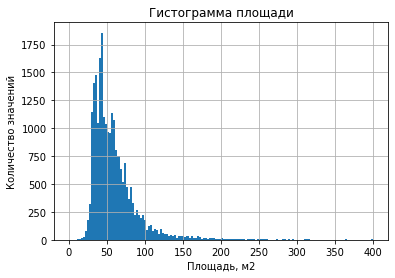

In [39]:
#проанализируем общую площадь
gis_pl = nd["area"].hist(bins=150, range=(0,400))
gis_pl.set_title("Гистограмма площади")
gis_pl.set_xlabel("Площадь, м2")
gis_pl.set_ylabel("Количество значений")

In [40]:
print('Максимальная площадь объекта', nd["area"].max())
print('Минимальная площадь объекта', nd["area"].min())

Максимальная площадь объекта 900.0
Минимальная площадь объекта 12.0


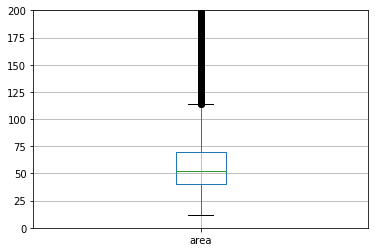

In [41]:
plt.ylim(0, 200)
nd.boxplot('area')
plt.show()

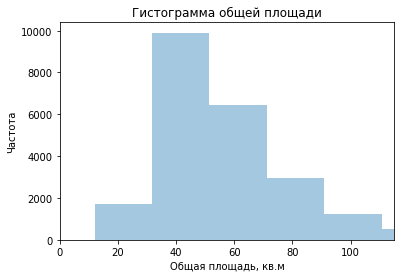

In [42]:
#построим диаграмму для объектов с площадью менее 115 кв.м.
sns.distplot(nd['area'], kde=False, bins=45)
plt.xlim(0, 115)
plt.title("Гистограмма общей площади")
plt.xlabel("Общая площадь, кв.м")
plt.ylabel("Частота")
plt.show()

In [43]:
nd.drop(nd[nd['area'] > 115 ].index, inplace=True)

✔️ Пик количества квартир приходится на площадь в 40-70 кв.м., что выглядит правдаподобно. 
    
   - Распределение имеет длинный правый хвост. Квартиры больше 115 кв. м. встречаются редко.
   -  Первый квартиль находится на уровне 40 кв.м.. 
   - Нижний "ус" упирается в 12, минимальное значение. Но, на самом деле есть коморки 12 кв.м.
   - Верхний ус заканчивается около 115 кв.м.
   - Все, что лежит за ориентировочной границей нормального размаха, считаем выбросом.


**1.2. Количество комнат**

Text(0, 0.5, 'Количество значений')

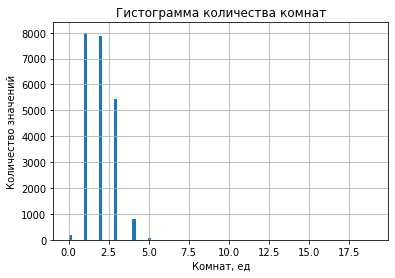

In [44]:
#проанализируем количество комнат
gis_rm = nd["rooms"].hist(bins=100, range=(0, 19))
gis_rm.set_title("Гистограмма количества комнат")
gis_rm.set_xlabel("Комнат, ед")
gis_rm.set_ylabel("Количество значений")

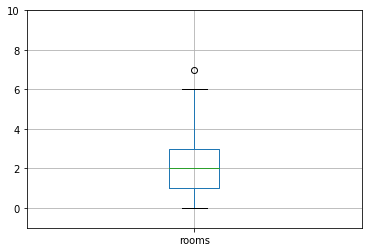

In [45]:
plt.ylim(-1, 10)
nd.boxplot('rooms')
plt.show()

    - Большая часть значений лежит в диапазоне до 3х комнат, что выглядит правдаподобно.
    - Первый квартиль находится на уровне 1 комнаты.
    - Нижний "ус" упирается в 0, минимальное значение. Считаем за ошибку в данных.
    - Верхний ус заканчивается около 6.
    - Выбросы лежат за ориентировочной границей нормального распределения.

In [46]:
nd.drop(nd[nd['rooms'] > 6 ].index, inplace=True)

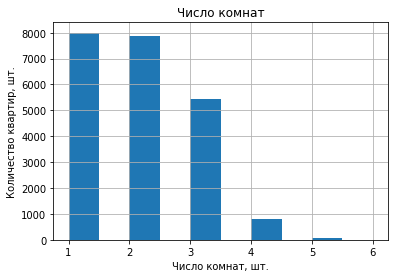

In [47]:
#данные без выбросов и ошибок
nd.query('rooms >= 1 and rooms <= 6')['rooms'].hist()
plt.title("Число комнат")
plt.xlabel("Число комнат, шт.")
plt.ylabel("Количество квартир, шт.")
plt.show()

✔️ В ходу, как обычно, однушки, двушки и трешки.

**1.3. Цена**

Ожидается, что цена будет сильно отличаться в зависимости от населенного пункта. В Санкт-Петербурге в среднем должно быть самое дорогое жилье, а в деревнях и поселках – намного дешевле.

Text(0, 0.5, 'Количество значений')

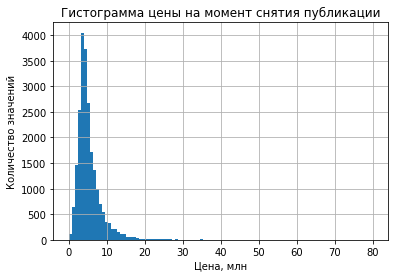

In [48]:
#проанализируем стоимость квратир
gis_pr = (nd["price"]/1000000).hist(bins=100, range=(0,80))
gis_pr.set_title("Гистограмма цены на момент снятия публикации")
gis_pr.set_xlabel("Цена, млн")
gis_pr.set_ylabel("Количество значений")

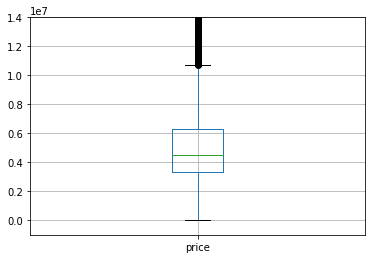

In [49]:
plt.ylim(-1e+06, 1.4e+07)
nd.boxplot('price')
plt.show()

    - Большая часть значений лежит в диапазоне до 7 млн., что выглядит правдаподобно.
    - Первый квартиль на уровне 3.4 млн.
    - Нижний "ус" упирается в 0. Минимум равен 12 190, в то время как средняя стоимость недвижимости – 6.5 млн. Это выглядит подозрительным. Взглянем на подобные записи.



In [50]:
pr_nd = nd.query('price < 4.5e+5')
pr_nd.sort_values('price').head()[['city', 'price', 'area']]

,city,price,area
8793,Санкт-Петербург,12190,109.0
14911,посёлок станции Свирь,430000,54.0
17456,Сланцы,430000,30.4
16274,деревня Старополье,440000,40.0


✔️ В Санкт-Петербурге квартира 109 кв.м. всего за 12 190 руб. Явная ошибка в данных.
Отменим нижнюю границу для чистых данных в 430 000 тыс. Смоимость в полмиллиона для деревней выглядит правдивой.

Согласно диаграмме размаха, верхний ус заканчивается около 12 000 000. Данные выше этого значения считаются выбросами. С другой стороны, есть много ну очень дорогой недвижимости, запредельная стоимость которой, является правдоподобной.


In [51]:
nd.drop(nd[nd['price'] > 8800000].index, inplace=True)
nd.drop(nd[nd['price'] < 200000].index, inplace=True)

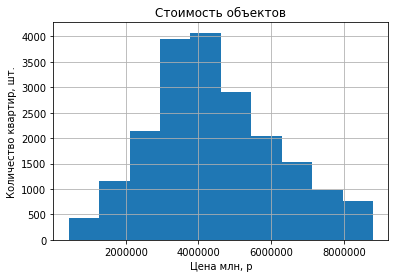

In [52]:
#данные без выбросов и ошибок
nd.query('price >= 4.3e+5 and price <= 1.2e+7')['price'].hist()
plt.title("Стоимость объектов")
plt.xlabel("Цена млн, р")
plt.ylabel("Количество квартир, шт.")
plt.show()

**1.4. Высота потолков**

Text(0, 0.5, 'Количество значений')

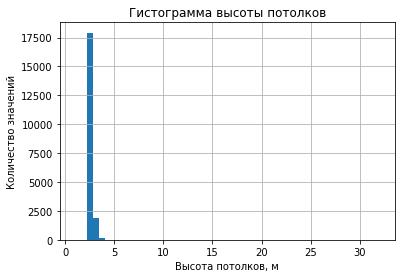

In [53]:
gis_pt = nd["ceiling_height"].hist(bins=50)
gis_pt.set_title("Гистограмма высоты потолков")
gis_pt.set_xlabel("Высота потолков, м")
gis_pt.set_ylabel("Количество значений")

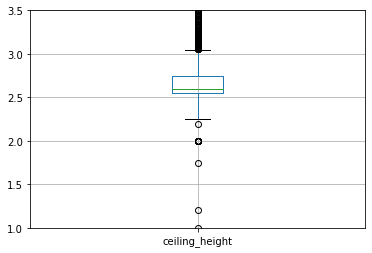

In [54]:
plt.ylim(1, 3.5)
nd.boxplot('ceiling_height')
plt.show()

    - Большая часть значений лежит в диапазоне до 2.8 м комнат, что выглядит правдаподобно.
    - Первый квартиль находится на уровне 2.5 м.
    - Нижний "ус" упирается в 2.2 м.
    - Верхний ус заканчивается около 3.2 м.

В среднем, параметр высоты потолков должен колебаться в пределах 2.4 - 3.2 м. Минимальная высота потолка определяется строительными нормами и правилами обычно как 2.5 м.

In [55]:
nd.drop(nd[nd['ceiling_height'] > 3.2 ].index, inplace=True)
nd.drop(nd[nd['ceiling_height'] < 2.5 ].index, inplace=True)

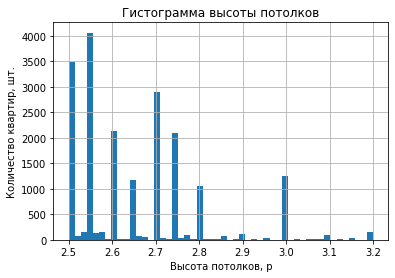

In [56]:
#данные без выбросов и ошибок
nd.query('ceiling_height >= 2.4 and ceiling_height <= 3.2')['ceiling_height'].hist(bins=50)
plt.title("Гистограмма высоты потолков")
plt.xlabel("Высота потолков, р")
plt.ylabel("Количество квартир, шт.")
plt.show()

**2-3. Изучим время продажи**

In [57]:
#посчитаем среднее и медиану
print(nd['days_exposition'].mean().round(0))
print(nd['days_exposition'].median().round(0))

160.0
95.0


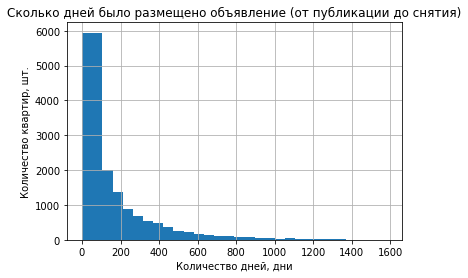

In [58]:
nd.hist('days_exposition', bins=30)
plt.title('Сколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней, дни')
plt.ylabel('Количество квартир, шт.')
plt.show()

Есть пик в районе 50 дней, продажи на отметке 800 дней уже редки. По прошествии 1000 дней продаж почти нет. Чтобы изучить особенность поближе, построим коробчатую диаграмму.

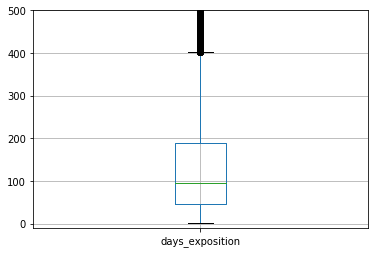

In [59]:
plt.ylim(-10, 500)
nd.boxplot(column='days_exposition')
plt.show()

       Большая часть значений лежит в диапазоне до 200 дней, что выглядит правдоподобно. Продать квартиру – дело небыстрое.
    Первый квартиль лежит на уровне 50 дней.
    Нижний ус упирается в 1, минимальное значение/
    Верхний заканчивается в около 430 дней.

    Наблюдается ярко выраженная доля выбросов, которую необходимо удалять.

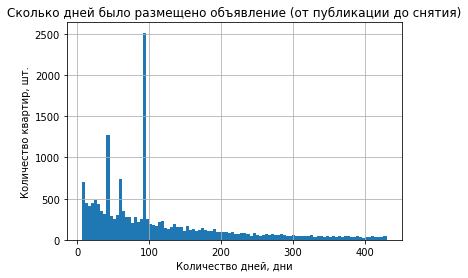

In [60]:
#данные без выбросов и ошибок
nd.query('days_exposition >= 7 and days_exposition <= 430')['days_exposition'].hist(bins=100)
plt.title('Сколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней, дни')
plt.ylabel('Количество квартир, шт.')
plt.show()

In [61]:
 nd.drop(nd[nd['days_exposition'] > 430 ].index, inplace=True)

In [62]:
nd.describe()

,images,price,area,rooms,ceiling_height,floors_house,living_area,floor_flat,kitchen_area,balcony,...,distance_center,parks_3km,park,ponds3km,pond,days_exposition,price_kvm,year,living_area_ratio,kitchen_area_ratio
count,17909.000000,1.790900e+04,17909.000000,17909.000000,17909.000000,17909.000000,17909.000000,17909.000000,17909.000000,17909.000000,...,17909.000000,17909.000000,17909.000000,17909.00000,17909.00000,17909.000000,17909.000000,17909.000000,17909.000000,17909.000000
mean,9.685856,4.417083e+06,50.245470,1.846893,2.655382,10.828689,28.748892,5.904573,9.067586,0.597856,...,11392.011558,0.376403,139.535597,0.47518,182.69077,110.439109,89753.845217,2017.542688,0.564091,0.189241
std,5.487628,1.727149e+06,15.774791,0.864967,0.148533,6.595887,11.498234,4.881165,3.316973,0.925278,...,9962.388633,0.667862,277.519650,0.77508,302.79584,96.587166,28333.727004,0.893809,0.100070,0.067059
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,7963.000000,2014.000000,0.038000,0.044000
25%,6.000000,3.200000e+06,38.000000,1.000000,2.550000,5.000000,18.000000,2.000000,6.700000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,44.000000,73211.000000,2017.000000,0.500000,0.141000
50%,9.000000,4.200000e+06,46.800000,2.000000,2.600000,9.000000,28.000000,4.000000,8.500000,0.000000,...,11975.000000,0.000000,0.000000,0.00000,0.00000,93.000000,91031.000000,2018.000000,0.568000,0.173000
75%,14.000000,5.500000e+06,60.000000,2.000000,2.750000,16.000000,36.000000,8.000000,10.600000,1.000000,...,15746.000000,1.000000,192.000000,1.00000,333.00000,144.000000,106742.000000,2018.000000,0.630000,0.230000
max,39.000000,8.800000e+06,115.000000,6.000000,3.200000,60.000000,93.600000,31.000000,50.000000,5.000000,...,65952.000000,3.000000,3190.000000,3.00000,1344.00000,430.000000,312240.000000,2019.000000,1.000000,0.788000


**Вывод**

Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 14 месяцев (430 дней) с момента публикации, это говорит об аномально долгой продаже.

**4. Какие факторы больше всего влияют на стоимость квартиры?**
1. зависит ли цена от площади, числа комнат, удалённости от центра.
2. зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
3. зависимость от даты размещения: дня недели, месяца и года.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c001df950>,
      dtype=object)

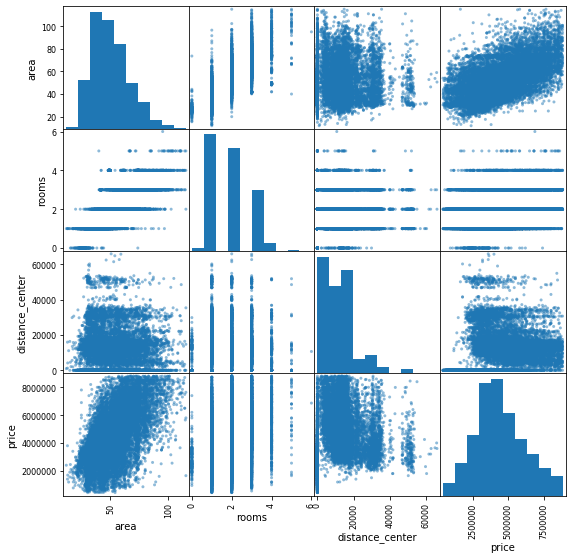

In [63]:
pd.plotting.scatter_matrix(nd[['area', 'rooms', 'distance_center', 'price']], figsize=(9, 9))

**4.1. Зависимость между ценой продажи объекта и площадью**

Text(0, 0.5, 'Цена продажи объекта млн.')

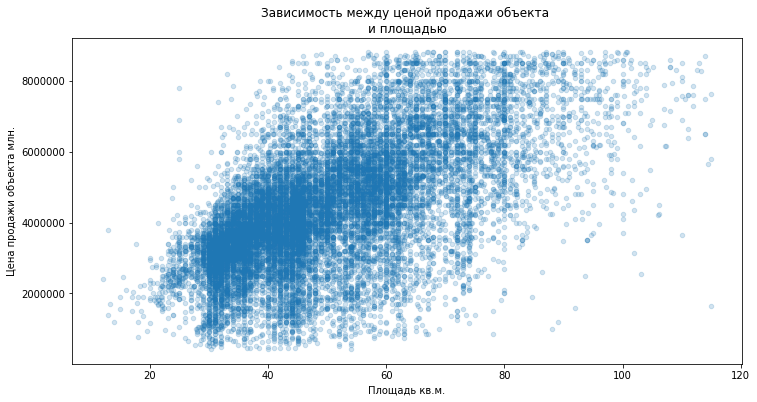

In [96]:
#зависимость цены от площади объекта
dig_pr_ar = nd.plot(x='area', y='price', kind="scatter", figsize=(12,6),alpha=0.2) 
dig_pr_ar.set_title("Зависимость между ценой продажи объекта \nи площадью")
dig_pr_ar.set_xlabel("Площадь кв.м.")
dig_pr_ar.set_ylabel("Цена продажи объекта млн.")

✔️ Исходя из диаграммы прослеживается зависимость между стоимостью объекта и его площадью - чем больше площадь, тем больше ее стоимость. Зачастую стоимость объекта и определяется от стоимости квадратного метра, умноженного на площадь. Так что такая взаимосвязь не противоречит реальному миру.

**Зависимость между ценой продажи объекта и количеством комнат**

Text(0, 0.5, 'Цена продажи объекта млн.')

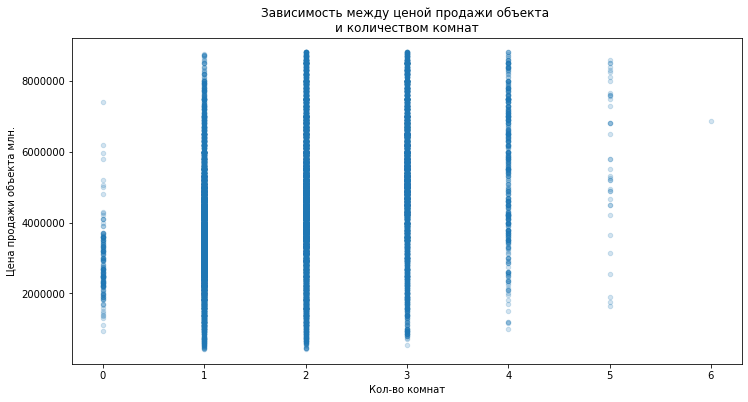

In [65]:
dig_pr_rm = nd.plot(x='rooms', y='price', kind="scatter", figsize=(12,6),alpha=0.2)
dig_pr_rm.set_title("Зависимость между ценой продажи объекта \nи количеством комнат")
dig_pr_rm.set_xlabel("Кол-во комнат")
dig_pr_rm.set_ylabel("Цена продажи объекта млн.")

✔️ Дороже всего продаются объекты, в которых 4-5 комнат. Интересно, что объекты, в которых больше комнат в большинстве случаев стоят дешевле. Скорее всего такие объекты встречаются нечасто в объявлениях и данных по ним не так много, поэтому отследить тенденцию сложно. В целом, судя по матрице корреляции, зависимость между ценой объекта и количеством комнат не такая сильная.

**Зависимость между ценой продажи объекта и удаленностью от центра**

Text(0, 0.5, 'Цена продажи квартиры')

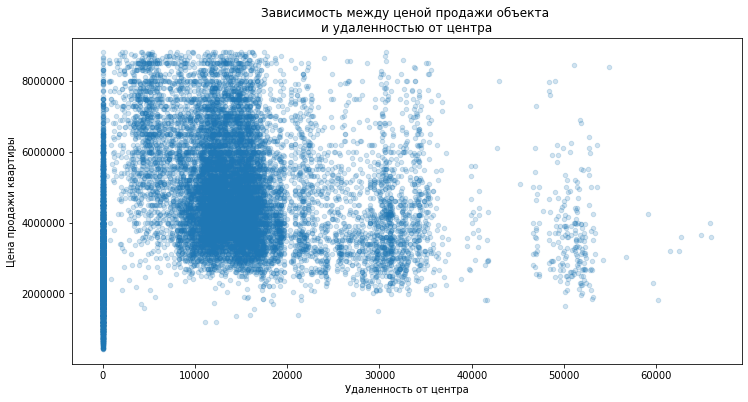

In [66]:
dig_pr_yd = nd.plot(x='distance_center', y='price', kind="scatter", figsize=(12,6),alpha=0.2) 
dig_pr_yd.set_title("Зависимость между ценой продажи объекта \nи удаленностью от центра")
dig_pr_yd.set_xlabel("Удаленность от центра")
dig_pr_yd.set_ylabel("Цена продажи квартиры")

✔️ Наблюдается отрицательная корреляция между ценой квартиры и удаленностью от центра. Корреляция не такая сильная, но даже на диаграмме заметна тенденция - чем ближе квартира к центру, тем дороже она стоит.

**4.2. Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**

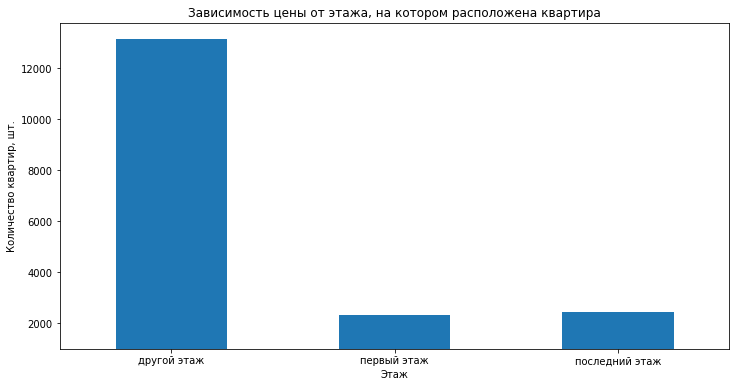

In [98]:
dig_pr_fg = nd.pivot_table(index='floor_groups', values='price', aggfunc='count')
dig=dig_pr_fg.plot(kind='bar', figsize=(12, 6),rot=360)
plt.ylim(bottom=1000)
dig.legend_.remove()
plt.title('Зависимость цены от этажа, на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир, шт.')
plt.show()

In [99]:
nd.pivot_table(index='floor_groups', values='price_kvm').astype(int)

,price_kvm
floor_groups,
другой этаж,93726
первый этаж,77148
последний этаж,80490


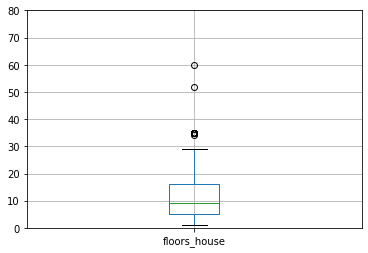

In [72]:
plt.ylim(0, 80)
nd.boxplot(column='floors_house')
plt.show()

In [73]:
nd.drop(nd[nd['floors_house'] > 50 ].index, inplace=True)
nd['floors_house'].describe()

count    17907.000000
mean        10.823644
std          6.578819
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_house, dtype: float64

✔️ Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.

**4.3. Зависимость от даты размещения: дня недели, месяца и года.**

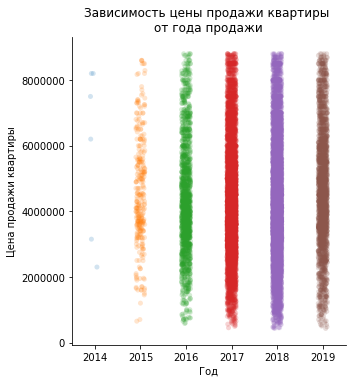

In [75]:
#по году продажи
dig_pr_y = sns.catplot(x="year", y="price", data=nd, alpha=0.2)
dig_pr_y.set(xlabel='Год', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот года продажи")

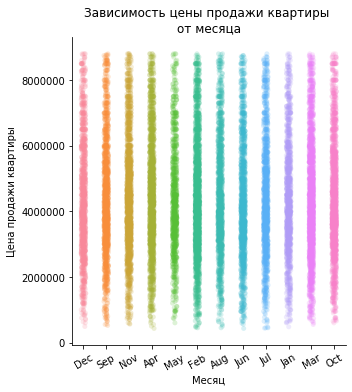

In [77]:
#по названию месяца (сезонность)
dig_pr_m = sns.catplot(x="month", y="price", data=nd, alpha=0.2)
dig_pr_m.set(xlabel='Месяц', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \nот месяца")
dig_pr_m.set_xticklabels(rotation=30)

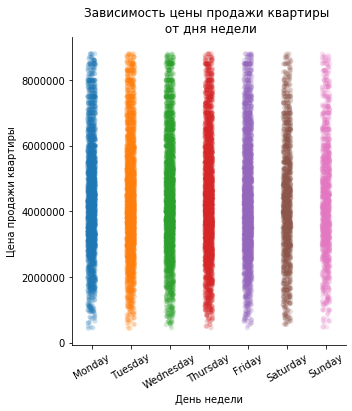

In [80]:
# Порядок задаем отдельно.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dig_pr_d = sns.catplot(x="weekday", y="price", data=nd, order=days, alpha=0.2)
dig_pr_d.set(xlabel='День недели', ylabel='Цена продажи квартиры', title="Зависимость цены продажи квартиры \n от дня недели")
dig_pr_d.set_xticklabels(rotation=30)

Text(0, 0.5, 'Цена продажи квартиры')

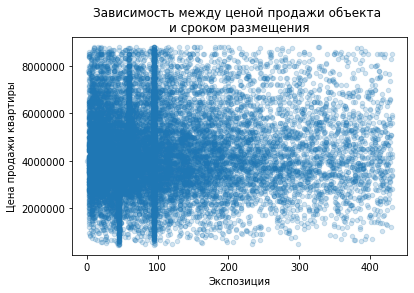

In [82]:
dig_pr_ex = nd.plot(x='days_exposition', y='price', kind="scatter", alpha=0.2) 
dig_pr_ex.set_title("Зависимость между ценой продажи объекта \nи сроком размещения")
dig_pr_ex.set_xlabel("Экспозиция")
dig_pr_ex.set_ylabel("Цена продажи квартиры")

**Вывод**

День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. Исследование лишь показало, что в среднем квартиры продавались по более высоким низким в 2014 году, но это объясняется макроэкономической ситуацией и переходом ЦБ РФ к плавающему курсу в конце 2014 года.

**5. Выберите 10 населённых пунктов с наибольшим числом объявлений.**

Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [83]:
#создадим сводную таблицу и почитаем колличество объявлений по городам и среднею цену квадратного метра
city_pivot=(nd.groupby('city')['price_kvm'].agg(['mean', 'count'])).sort_values(by='count', ascending=False).round(0).astype(int).head(10)
city_pivot

,mean,count
city,,
Санкт-Петербург,103579,10947
посёлок Мурино,85899,476
посёлок Шушары,78585,401
Всеволожск,66634,344
Колпино,75197,310
посёлок Парголово,89903,301
Пушкин,99158,283
Гатчина,68590,268
деревня Кудрово,92198,258


In [84]:
print(city_pivot.sort_values(by='mean', ascending=False).head(3))
print(city_pivot.sort_values(by='mean', ascending=False).tail(3))

                   mean  count
city                          
Санкт-Петербург  103579  10947
Пушкин            99158    283
деревня Кудрово   92198    258
             mean  count
city                    
Гатчина     68590    268
Всеволожск  66634    344
Выборг      58113    200


✔️ Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово.Однако в среднем дешевле всего квадратные метры в Выборге и Всеволожске.
Результаты вызывают вопросы: цена квадратного метра в деревне больше, чем в городе. Необходимо будет установить, насколько такая разница в средней цене квадратного метра обоснована и вызвана близостью к центру Санкт-Петербурга.

**6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге**

In [85]:
#выделим всю недвижимость в Санкт-Петербурге
spb = pd.DataFrame(nd.loc[nd['city'] == "Санкт-Петербург"])
spb.reset_index()
len(spb)

10947

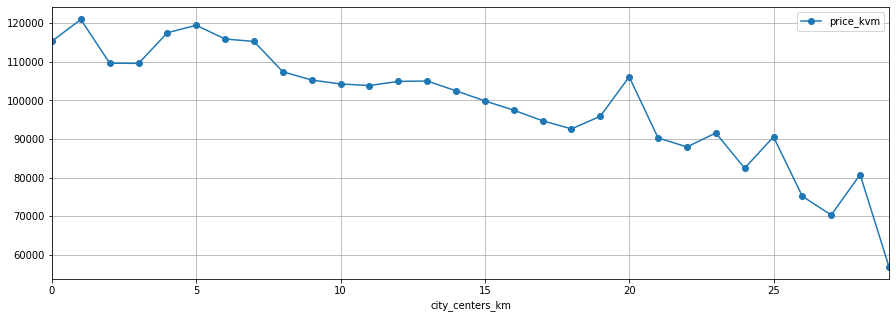

In [86]:
#добавим столбец с километрами до центра
spb['city_centers_km'] = (spb['distance_center'] / 1000).astype('int')

#выведем график с зависимостью цены от удаления от центра
(spb
     .query('city == "Санкт-Петербург"')
     .pivot_table(index='city_centers_km', values='price_kvm', aggfunc='mean')
     .plot(grid=True, style='o-', figsize=(15, 5))
)

✔️ Чем дальше квартира находится от центра, тем дешевле она стоит - наблюдается четкий нисходящий тренд. Центральную зону выделю в промежутке до 6 км от центра. После 6 км график резко уходит вниз. На расстоянии после 26 км наблюдается неожиданный пик. Не всем людям нравится жить в центре города и некоторые предпочитают жить в зонах с менее плотной постройкой и ездить на работу в центр. Спрос на такие квартиры может быть высоким, а спрос формирует предложение с соответствующими ценами.

**7. Необходимо выделить сегмент квартир в центре.** 
- Проанализировать параметры: площадь, цена, число комнат, высота потолков,  а также этаж, удалённость от центра, дата размещения объявления.

In [87]:
#выделим сегмент квартир в центре.
spb_center = pd.DataFrame(spb.query('city_centers_km < 3'))
len(spb_center)

171

In [88]:
spb_center[['price', 'area', 'data', 'floor_flat', 'floors_house', 'rooms', 'ceiling_height', 'distance_center', 'days_exposition']].describe().astype(int)

,price,area,floor_flat,floors_house,rooms,ceiling_height,distance_center,days_exposition
count,171,171,171,171,171,171,171,171
mean,6303023,58,3,5,2,2,1614,119
std,1645699,20,2,4,0,0,968,97
min,2100000,12,1,2,0,2,0,3
25%,5199999,45,2,4,2,2,886,58
50%,6500000,57,3,5,2,2,1877,95
75%,7640000,72,4,5,3,3,2370,160
max,8800000,113,19,25,5,3,2999,402


✔️ Необычных параметров достаточно, довольно странными выглядят:
- максимальные значения: высота потолков -32м; общая площадь в 631 кв.м (возможно это коттедж с 19 комнатами); экспозиция в 1572 дня. 

Миниммальная высота потолков - 2,4м вполне реалистично
Так же как и площадь квартиры ы 12 кв.м, возможно комната в общежитии

## Общий вывод

Цены на квартиры как в центре Санкт-Петербурга, так и в целом по области зависят в первую очередь от общей площади, а также от жилой площади и площади кухни, в меньшей степени от количества комнат. Остальные факторы оказывают на ценообразование меньшее влияние.

Для определения рыночной стоимости объектов недвижимости важны следующие параметры:

    - общая площадь квартиры (аномальные значения: более 115 кв. м)
    - квартиры на первом этаже в целом стоят дешевле. На последнем дороже, чем на первом, но дешевле, чем на любом другом.
    - расстояние до центра города (центр города огранчен окружностью радиусом 6 км). Самое большое отличие в переменной расстояние от центра города. В выборке по всему городу расстояние оказывает большее влияние на цену продажи квартиры, чем среди квартир, которые находятся в центре, что логично.
    - число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее)
    - срок продажи квартиры (слишком быстрая продажа — до 1 месяца (особенно аномальные сроки меньше 2-х недель), слишком долгая продажа — более 4 дет (1572 дня)).
    - кроме того, необходимо ввести ограничения на ввод данных о высоте потолков: допущено множество ручных ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).


Для полноценного анализа, в отчете не хватает важнейших данных - точного адреса объектов. Наличие данного признака в таблице значительно упростило бы задачу в виде заполнения пропусков. Также в таблице присутсвует огромное количество пропусков, которые возникли в ходе "забуксовки" системы определения расстояния до объекта из картографического сервиса. Из-за отсутствия выпадающего списка в форме при подаче объявления, пользователи допускают много ошибок, что влияет как на привлекательность объявления, так и на срок экспозиции объекта. Разработчикам следует уделить особое внимание на автоматизацию формы при ее оптимизации. 

In [95]:
spb_center[['price', 'area', 'floor_flat', 'floors_house', 'kitchen_area', 'rooms', 'ceiling_height', 'days_exposition']].median()

price              6500000.0
area                    57.1
floor_flat               3.0
floors_house             5.0
kitchen_area             9.9
rooms                    2.0
ceiling_height           2.8
days_exposition         95.0
dtype: float64

In [94]:
spb[['price', 'area', 'floor_flat', 'floors_house', 'kitchen_area','rooms', 'ceiling_height', 'days_exposition']].median()

price              4850000.00
area                    47.00
floor_flat               5.00
floors_house             9.00
kitchen_area             8.50
rooms                    2.00
ceiling_height           2.64
days_exposition         88.00
dtype: float64

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  посчитано и добавлено в таблицу: цена квадратного метра
- [х]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [х]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [х]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [х]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [х]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [х]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [х]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [х]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [х]  в каждом этапе есть выводы
- [х]  есть общий вывод